# Plotting Tools

In [2]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Single Experiment Plot

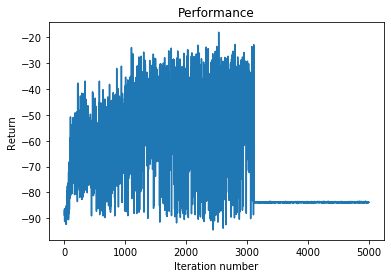

In [3]:
log_dir = "/home/yliu2/catkin_ws_py3/src/mbrl_hof/script/pets/log"  # Directory specified in script, not including date+time
time_stamp = "2020-02-27--19:54:34"
min_num_trials = 5000# Plots up to this many trials

returns = []

data = loadmat(os.path.join(log_dir, time_stamp, "logs.mat"))
if data["returns"].shape[1] >= min_num_trials:
    returns.append(data["returns"][0][:min_num_trials])
        
returns = np.array(returns)
# returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()

### Avg. Experiments plot

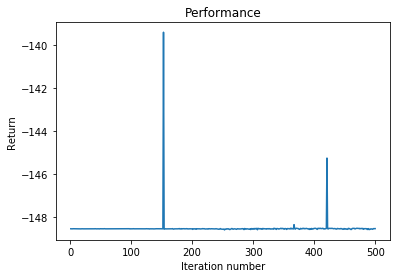

In [33]:
log_dir = "/home/yliu2/catkin_ws_py3/src/mbrl_hof/script/pets/log/"          # Directory specified in script, not including date+time
min_num_trials = 500 # Plots up to this many trials


returns = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
        
returns = np.array(returns)
# returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()